In [0]:
from google.colab import files
uploaded = files.upload()

Saving dummydata.csv to dummydata.csv


In [0]:
import pandas as pd
import numpy as np
df = pd.read_csv('dummydata.csv')
pd.DataFrame.from_records(df)
df.head()

,Unnamed: 0,age,self_employed,family_history,mh_treatment,interfere,company_size,remote,tech_company,mh_negative_consequence_flag,ph_negative_consequence_flag,mh_disscuss_coworker,mh_disscuss_supervisor,interview_mh_bringup,interview_ph_bringup,witness_mh_nc,anonymity_protected_Yes,anonymity_protected_No,anonymity_protected_Don't know,awareness_mh_benefits_Not sure,awareness_mh_benefits_Yes,awareness_mh_benefits_No,gender_M,gender_F,gender_T,medical_leave_easy_Very easy,medical_leave_easy_Somewhat difficult,medical_leave_easy_Don't know,medical_leave_easy_Very difficult,medical_leave_easy_Somewhat easy,mh_benefits_Yes,mh_benefits_No,mh_benefits_Don't know,mh_discuss_Yes,mh_discuss_No,mh_discuss_Don't know,mh_resources_Don't know,mh_resources_No,mh_resources_Yes,mh_serious_ph_Yes,mh_serious_ph_No,mh_serious_ph_Don't know,country_United States,country_United Kingdom,country_Canada,country_Netherlands,country_Australia,country_France,country_Germany,country_Ireland,country_India
0,1,3,1,1,0,3,1,1,1,0,0,2,2,0,2,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,2,0,1,1,3,4,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
2,3,2,1,0,0,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
3,4,3,0,0,1,4,3,1,1,1,0,1,2,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
4,5,3,0,0,1,1,6,0,0,1,0,0,0,0,2,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [0]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0  age  ...  country_Ireland  country_India
0             1    3  ...                0              0
1             2    2  ...                0              0
2             3    2  ...                0              0
3             4    3  ...                0              0
4             5    3  ...                0              0
..          ...  ...  ...              ...            ...
891         892    2  ...                0              0
892         893    2  ...                0              0
893         894    2  ...                0              0
894         895    2  ...                0              0
895         896    3  ...                0              0

[896 rows x 51 columns]>

In [0]:
df.columns

Index(['Unnamed: 0', 'age', 'self_employed', 'family_history', 'mh_treatment',
       'interfere', 'company_size', 'remote', 'tech_company',
       'mh_negative_consequence_flag', 'ph_negative_consequence_flag',
       'mh_disscuss_coworker', 'mh_disscuss_supervisor',
       'interview_mh_bringup', 'interview_ph_bringup', 'witness_mh_nc',
       'anonymity_protected_Yes', 'anonymity_protected_No',
       'anonymity_protected_Don't know', 'awareness_mh_benefits_Not sure',
       'awareness_mh_benefits_Yes', 'awareness_mh_benefits_No', 'gender_M',
       'gender_F', 'gender_T', 'medical_leave_easy_Very easy',
       'medical_leave_easy_Somewhat difficult',
       'medical_leave_easy_Don't know', 'medical_leave_easy_Very difficult',
       'medical_leave_easy_Somewhat easy', 'mh_benefits_Yes', 'mh_benefits_No',
       'mh_benefits_Don't know', 'mh_discuss_Yes', 'mh_discuss_No',
       'mh_discuss_Don't know', 'mh_resources_Don't know', 'mh_resources_No',
       'mh_resources_Yes', 'mh_ser

In [0]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,age,self_employed,family_history,mh_treatment,interfere,company_size,remote,tech_company,mh_negative_consequence_flag,ph_negative_consequence_flag,mh_disscuss_coworker,mh_disscuss_supervisor,interview_mh_bringup,interview_ph_bringup,witness_mh_nc,anonymity_protected_Yes,anonymity_protected_No,anonymity_protected_Don't know,awareness_mh_benefits_Not sure,awareness_mh_benefits_Yes,awareness_mh_benefits_No,gender_M,gender_F,gender_T,medical_leave_easy_Very easy,medical_leave_easy_Somewhat difficult,medical_leave_easy_Don't know,medical_leave_easy_Very difficult,medical_leave_easy_Somewhat easy,mh_benefits_Yes,mh_benefits_No,mh_benefits_Don't know,mh_discuss_Yes,mh_discuss_No,mh_discuss_Don't know,mh_resources_Don't know,mh_resources_No,mh_resources_Yes,mh_serious_ph_Yes,mh_serious_ph_No,mh_serious_ph_Don't know,country_United States,country_United Kingdom,country_Canada,country_Netherlands,country_Australia,country_France,country_Germany,country_Ireland,country_India
0,3,1,1,0,3,1,1,1,0,0,2,2,0,2,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,0,1,1,3,4,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
2,2,1,0,0,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
3,3,0,0,1,4,3,1,1,1,0,1,2,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
4,3,0,0,1,1,6,0,0,1,0,0,0,0,2,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [0]:
df.shape

(896, 50)

Supervised ML

In [0]:
X=df.loc[:, df.columns != 'mh_treatment']
X.head()

,age,self_employed,family_history,interfere,company_size,remote,tech_company,mh_negative_consequence_flag,ph_negative_consequence_flag,mh_disscuss_coworker,mh_disscuss_supervisor,interview_mh_bringup,interview_ph_bringup,witness_mh_nc,anonymity_protected_Yes,anonymity_protected_No,anonymity_protected_Don't know,awareness_mh_benefits_Not sure,awareness_mh_benefits_Yes,awareness_mh_benefits_No,gender_M,gender_F,gender_T,medical_leave_easy_Very easy,medical_leave_easy_Somewhat difficult,medical_leave_easy_Don't know,medical_leave_easy_Very difficult,medical_leave_easy_Somewhat easy,mh_benefits_Yes,mh_benefits_No,mh_benefits_Don't know,mh_discuss_Yes,mh_discuss_No,mh_discuss_Don't know,mh_resources_Don't know,mh_resources_No,mh_resources_Yes,mh_serious_ph_Yes,mh_serious_ph_No,mh_serious_ph_Don't know,country_United States,country_United Kingdom,country_Canada,country_Netherlands,country_Australia,country_France,country_Germany,country_Ireland,country_India
0,3,1,1,3,1,1,1,0,0,2,2,0,2,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,0,1,3,4,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
2,2,1,0,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
3,3,0,0,4,3,1,1,1,0,1,2,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
4,3,0,0,1,6,0,0,1,0,0,0,0,2,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [0]:
X.columns

Index(['age', 'self_employed', 'family_history', 'interfere', 'company_size',
       'remote', 'tech_company', 'mh_negative_consequence_flag',
       'ph_negative_consequence_flag', 'mh_disscuss_coworker',
       'mh_disscuss_supervisor', 'interview_mh_bringup',
       'interview_ph_bringup', 'witness_mh_nc', 'anonymity_protected_Yes',
       'anonymity_protected_No', 'anonymity_protected_Don't know',
       'awareness_mh_benefits_Not sure', 'awareness_mh_benefits_Yes',
       'awareness_mh_benefits_No', 'gender_M', 'gender_F', 'gender_T',
       'medical_leave_easy_Very easy', 'medical_leave_easy_Somewhat difficult',
       'medical_leave_easy_Don't know', 'medical_leave_easy_Very difficult',
       'medical_leave_easy_Somewhat easy', 'mh_benefits_Yes', 'mh_benefits_No',
       'mh_benefits_Don't know', 'mh_discuss_Yes', 'mh_discuss_No',
       'mh_discuss_Don't know', 'mh_resources_Don't know', 'mh_resources_No',
       'mh_resources_Yes', 'mh_serious_ph_Yes', 'mh_serious_ph_No',
   

In [0]:
y=df.mh_treatment
y.head()

0    0
1    1
2    0
3    1
4    1
Name: mh_treatment, dtype: int64

In [0]:
np.random.seed(888)
#Split X and y into train (70%) and test (30%) sets. 
from sklearn.model_selection import train_test_split
# Let 20% of the data to be a test set
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=0)

1. Linear Regression

In [0]:
#fit the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model1 = LinearRegression()
model1.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# coefficeints of the trained model
print('\nCoefficient of model :', model1.coef_)

# intercept of the model
print('\nIntercept of model',model1.intercept_)

# predict the target on the test dataset
predict_train1 = model1.predict(train_x)

# Root Mean Squared Error on training dataset
rmse_train1 = mean_squared_error(train_y,predict_train1)**(0.5)
print('\nRMSE on train dataset : ', rmse_train1)



Coefficient of model : [ 7.94394178e-02 -3.13073938e-02  1.35247094e-01  2.00005298e-01
  2.16494895e-03  6.28433680e-03 -3.96517007e-03  2.29191247e-02
 -9.32070297e-03  6.02567060e-02 -8.94607436e-03  9.01932694e-03
  1.84655909e-02  6.08269687e-03  2.47073445e+11  2.47073445e+11
  2.47073445e+11 -6.17962248e+11 -6.17962248e+11 -6.17962248e+11
 -2.39548373e+11 -2.39548373e+11 -2.39548373e+11 -3.63133064e+11
 -3.63133064e+11 -3.63133064e+11 -3.63133064e+11 -3.63133064e+11
 -4.70124964e+11 -4.70124964e+11 -4.70124964e+11 -5.22730142e+11
 -5.22730142e+11 -5.22730142e+11 -7.48774855e+11 -7.48774855e+11
 -7.48774855e+11 -1.77157781e+11 -1.77157781e+11 -1.77157781e+11
 -1.33097841e+11 -1.33097841e+11 -1.33097841e+11 -1.33097841e+11
 -1.33097841e+11 -1.33097841e+11 -1.33097841e+11 -1.33097841e+11
 -1.33097841e+11]

Intercept of model 3025455823032.587

RMSE on train dataset :  0.38898088972415895


In [0]:
# predict the target on the testing dataset
predict_test1 = model1.predict(test_x)

# Root Mean Squared Error on testing dataset
rmse_test1 = mean_squared_error(test_y,predict_test1)**(0.5)
print('\nRMSE on test dataset : ', rmse_test1)


RMSE on test dataset :  0.3846918650527029


2. Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model2 = DecisionTreeClassifier()

# fit the model with the training data
model2.fit(train_x,train_y)

# depth of the decision tree
print('Depth of the Decision Tree :', model2.get_depth())


Depth of the Decision Tree : 21


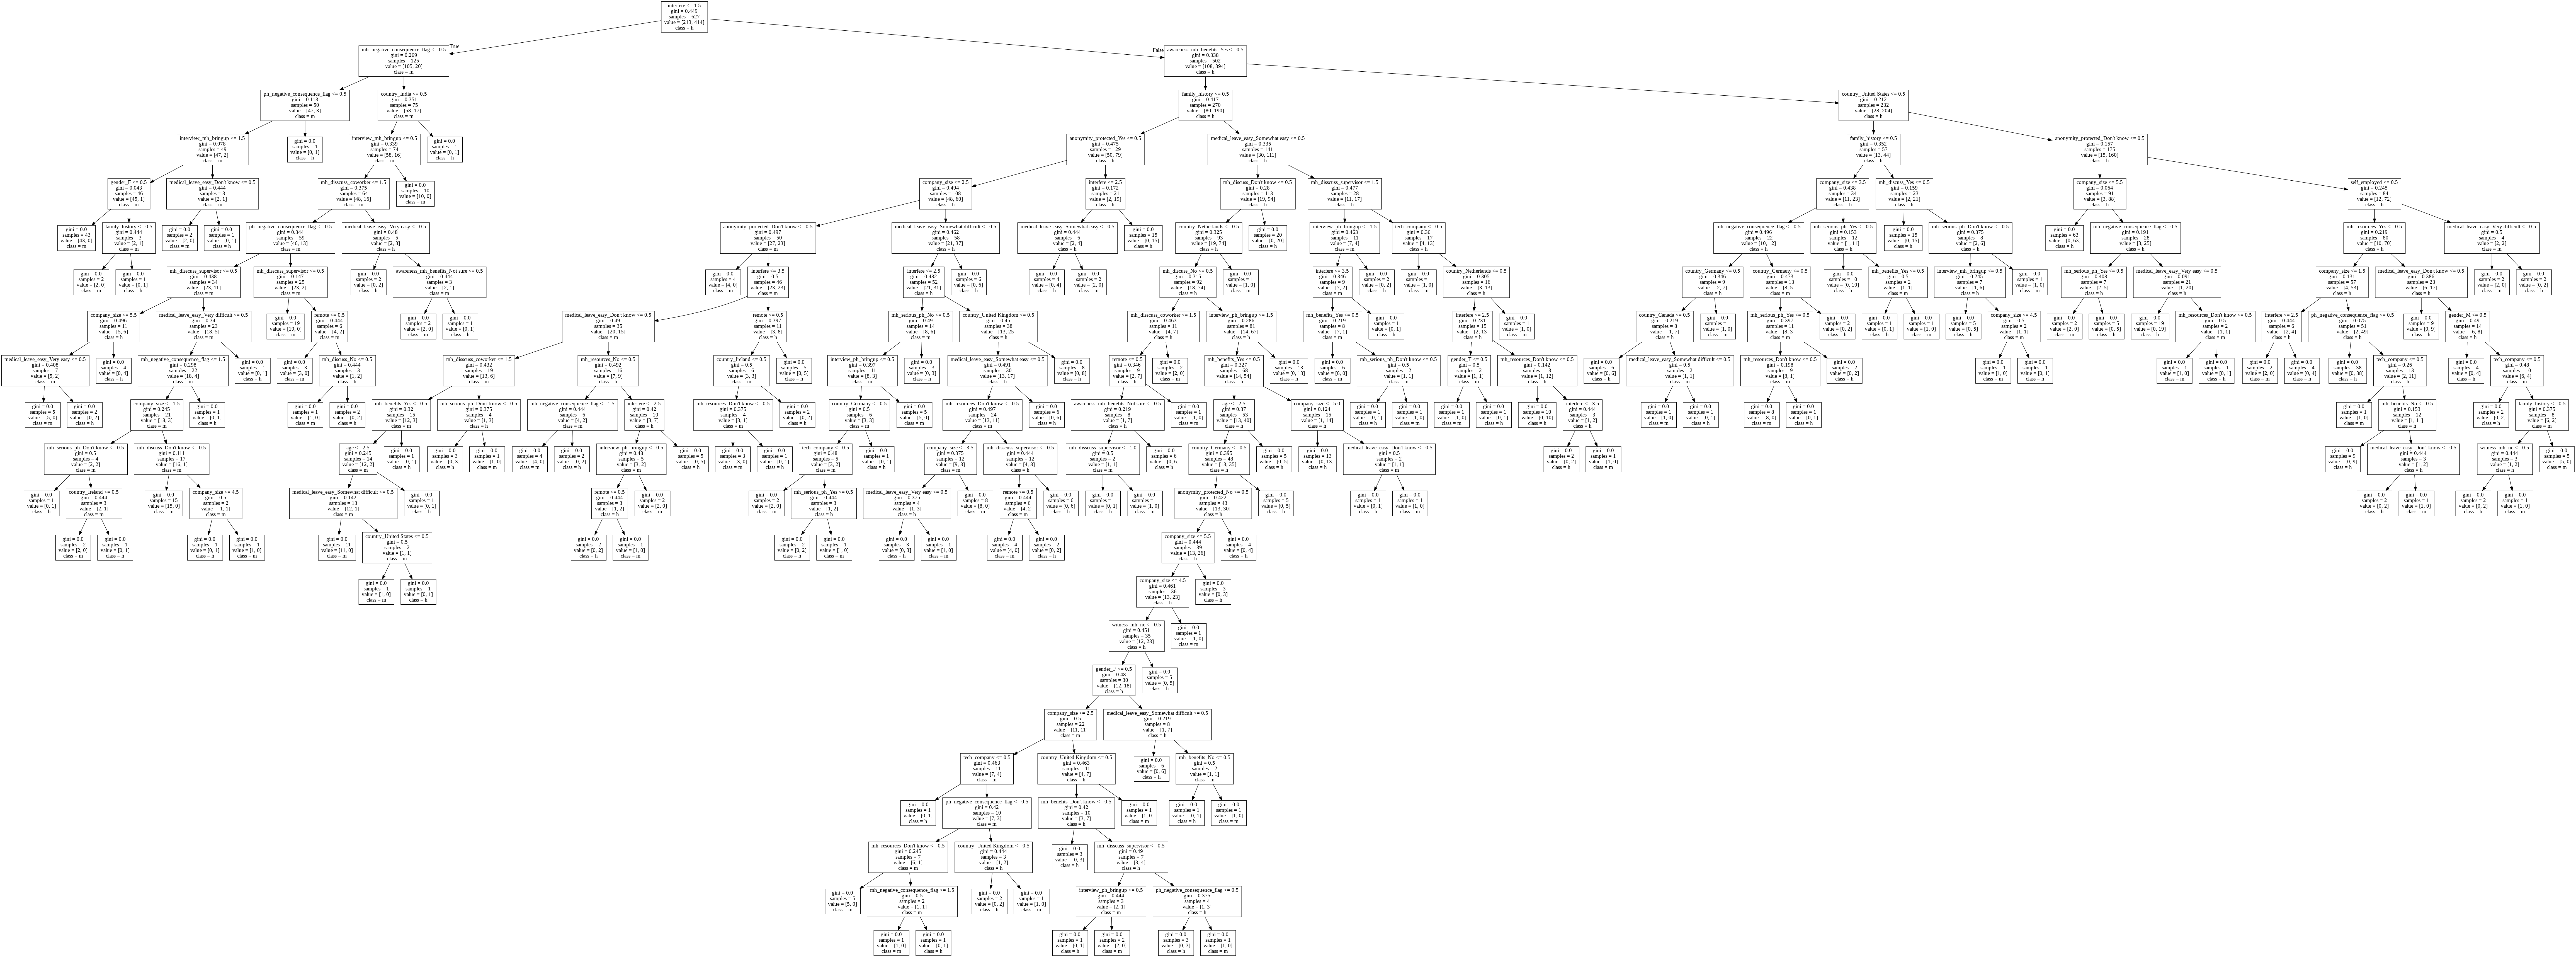

In [0]:
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus
# Create DOT data
dot_data = tree.export_graphviz(model2.fit(train_x,train_y), out_file=None, 
                                feature_names=train_x.columns,  
                                class_names=train_y.name)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [0]:
# predict the target on the train dataset
predict_train2 = model2.predict(train_x)

# Accuray Score on train dataset
accuracy_train2 = accuracy_score(train_y,predict_train2)
print('accuracy_score on train dataset : ', accuracy_train2)


accuracy_score on train dataset :  1.0


In [0]:
# predict the target on the test dataset
predict_test2 = model2.predict(test_x)

# Accuracy Score on test dataset
accuracy_test2 = accuracy_score(test_y,predict_test2)
print('accuracy_score on test dataset : ', accuracy_test2)

accuracy_score on test dataset :  0.7026022304832714


3. Decision Tree Calssifier

In [0]:
model3 = DecisionTreeClassifier(max_depth=5)

# fit the model with the training data
model3.fit(train_x,train_y)

# depth of the decision tree
print('Depth of the Decision Tree :', model3.get_depth())

Depth of the Decision Tree : 5


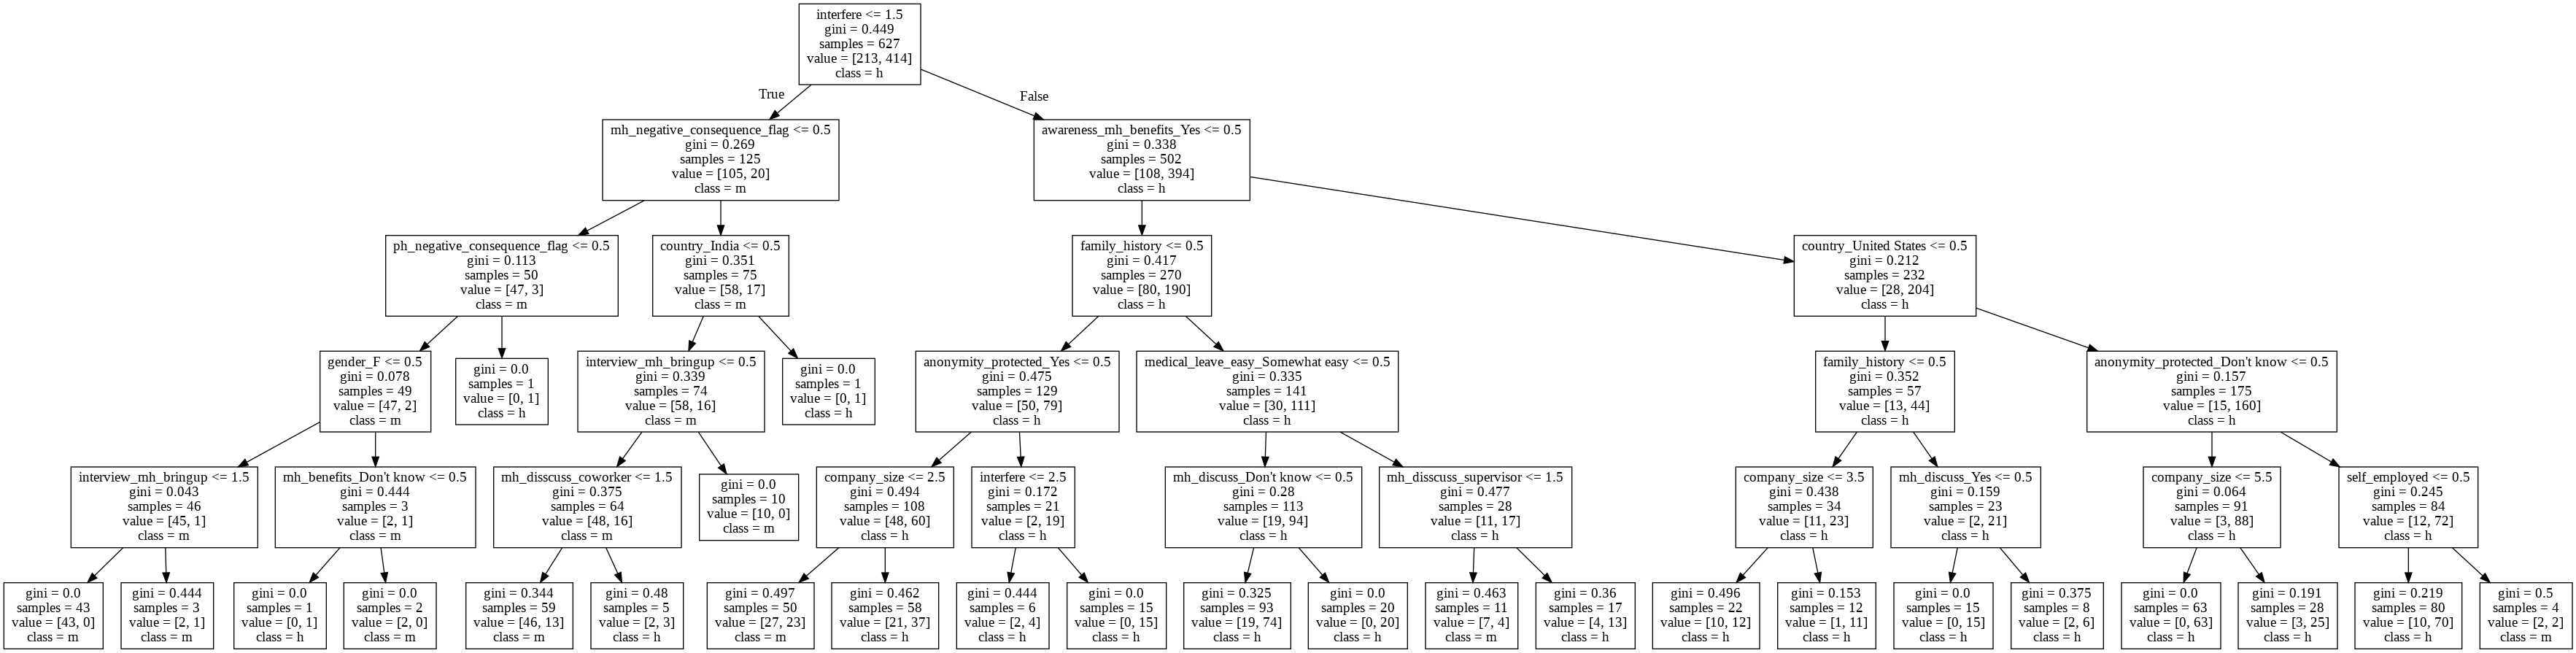

In [0]:
# Create DOT data
dot_data3 = tree.export_graphviz(model3.fit(train_x,train_y), out_file=None, 
                                feature_names=train_x.columns,  
                                class_names=train_y.name)

# Draw graph
graph3 = pydotplus.graph_from_dot_data(dot_data3)  

# Show graph
Image(graph3.create_png())

In [0]:
# predict the target on the train dataset
predict_train3 = model3.predict(train_x)

# Accuray Score on train dataset
accuracy_train3 = accuracy_score(train_y,predict_train3)
print('accuracy_score on train dataset : ', accuracy_train3)

accuracy_score on train dataset :  0.8133971291866029


In [0]:
# predict the target on the test dataset
predict_test3 = model3.predict(test_x)

# Accuracy Score on test dataset
accuracy_test3 = accuracy_score(test_y,predict_test3)
print('accuracy_score on test dataset : ', accuracy_test3)

accuracy_score on test dataset :  0.758364312267658


4. SVM

In [0]:
from sklearn.svm import SVC
model4 = SVC()

# fit the model with the training data
model4.fit(train_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# predict the target on the train dataset
predict_train4 = model4.predict(train_x)

# Accuray Score on train dataset
accuracy_train4 = accuracy_score(train_y,predict_train4)
print('accuracy_score on train dataset : ', accuracy_train4)

accuracy_score on train dataset :  0.8181818181818182


In [0]:
# predict the target on the test dataset
predict_test4 = model4.predict(test_x)

# Accuracy Score on test dataset
accuracy_test4 = accuracy_score(test_y,predict_test4)
print('accuracy_score on test dataset : ', accuracy_test4)

accuracy_score on test dataset :  0.8066914498141264


5. KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier()  

# fit the model with the training data
model5.fit(train_x,train_y)

# Number of Neighbors used to predict the target
print('\nThe number of neighbors used to predict the target : ',model5.n_neighbors)


The number of neighbors used to predict the target :  5


In [0]:
# predict the target on the train dataset
predict_train5 = model5.predict(train_x)

# Accuray Score on train dataset
accuracy_train5 = accuracy_score(train_y,predict_train5)
print('accuracy_score on train dataset : ', accuracy_train5)

accuracy_score on train dataset :  0.8197767145135566


In [0]:
# predict the target on the test dataset
predict_test5 = model5.predict(test_x)

# Accuracy Score on test dataset
accuracy_test5 = accuracy_score(test_y,predict_test5)
print('accuracy_score on test dataset : ', accuracy_test5)

accuracy_score on test dataset :  0.7211895910780669


6. GBM

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
model6 = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# fit the model with the training data
model6.fit(train_x,train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
# predict the target on the train dataset
predict_train6 = model6.predict(train_x)

# Accuray Score on train dataset
accuracy_train6 = accuracy_score(train_y,predict_train6)
print('\naccuracy_score on train dataset : ', accuracy_train6)


accuracy_score on train dataset :  0.9904306220095693


In [0]:
# predict the target on the test dataset
predict_test6 = model6.predict(test_x)

# Accuracy Score on test dataset
accuracy_test6 = accuracy_score(test_y,predict_test6)
print('\naccuracy_score on test dataset : ', accuracy_test6)


accuracy_score on test dataset :  0.724907063197026


7. XGBoost

In [0]:
from xgboost import XGBClassifier
model7 = XGBClassifier()

# fit the model with the training data
model7.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# predict the target on the train dataset
predict_train7 = model7.predict(train_x)

# Accuray Score on train dataset
accuracy_train7 = accuracy_score(train_y,predict_train7)
print('\naccuracy_score on train dataset : ', accuracy_train7)


accuracy_score on train dataset :  0.8389154704944178


In [0]:
# predict the target on the test dataset
predict_test7 = model7.predict(test_x)

# Accuracy Score on test dataset
accuracy_test7 = accuracy_score(test_y,predict_test7)
print('\naccuracy_score on test dataset : ', accuracy_test7)


accuracy_score on test dataset :  0.7695167286245354


Unsupervised ML 

PCA + kmeans

In [0]:
#scaler data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df)

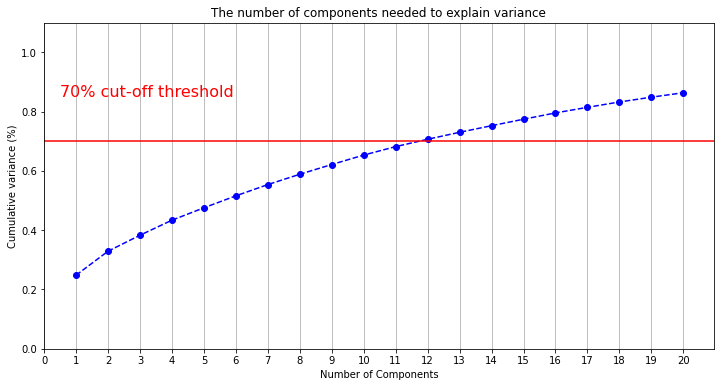

In [0]:
# find the suitable number of components
from sklearn.decomposition import PCA
pca = PCA().fit(data_rescaled)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 21, step=1)
y = np.cumsum(pca.explained_variance_ratio_)[1:21]

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 21, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.70, color='r', linestyle='-')
plt.text(0.5, 0.85, '70% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In order to get aroud 70%, we decided to choose the first 12 components.

In [0]:
#fit the model
pca_final = PCA(n_components = 12)  
pca_final.fit(data_rescaled) 
data_pca = pca_final.fit_transform(data_rescaled) 
data_pca.shape

(896, 12)

In [0]:
#find reasonable number of k with elbow method
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data_pca) 
    kmeanModel.fit(data_pca)     
      
    distortions.append(sum(np.min(cdist(data_pca, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / data_pca.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(data_pca, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / data_pca.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


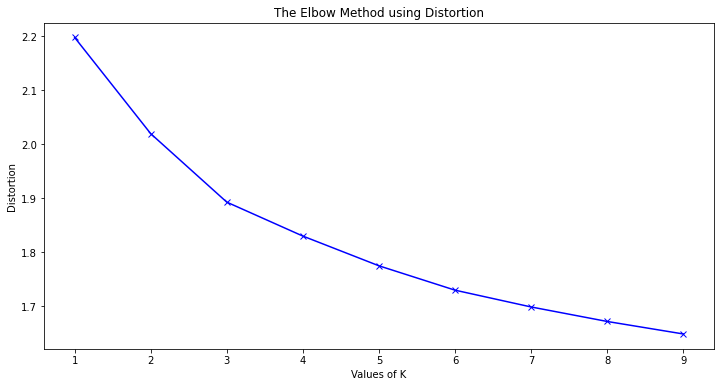

In [0]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

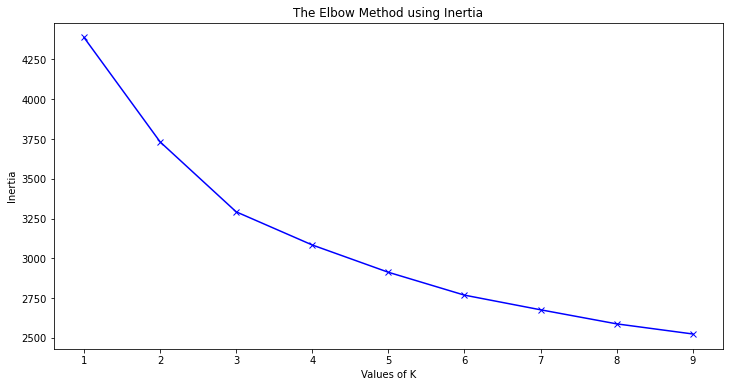

In [0]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

Based on the results, we chose to use k=5.

In [0]:
#fit the kmeans model
kmeans= KMeans(n_clusters=5)
kmeans5=kmeans.fit_predict(data_pca)

In [0]:
kmeans.cluster_centers_

array([[-0.4429739 ,  1.05666511,  0.43913159,  0.28931182,  0.11870278,
        -0.09887435, -0.00617988, -0.07980882, -0.07975342, -0.05690273,
         0.12475788,  0.15104256],
       [-1.07536002, -0.34658112, -0.08408743, -0.11913515,  0.10029392,
         0.18634079, -0.02428671,  0.00897236,  0.06673901,  0.05804446,
        -0.03544   , -0.17652532],
       [ 1.53302396,  0.07519759,  0.0984913 , -0.14740826,  0.2511941 ,
         0.16342133, -0.03881158, -0.01913487, -0.05577262,  0.09761498,
         0.04129115, -0.1241347 ],
       [-0.00363126, -1.22165991,  0.41078203,  0.09182208, -0.23131532,
        -0.18612103,  0.15502751, -0.00565208, -0.06049708, -0.10816998,
         0.06534425,  0.0312912 ],
       [ 0.26556962,  0.15832695, -0.79598708, -0.08762594, -0.33144407,
        -0.14719943, -0.04429081,  0.0998988 ,  0.10781135, -0.02589955,
        -0.18514208,  0.15876326]])

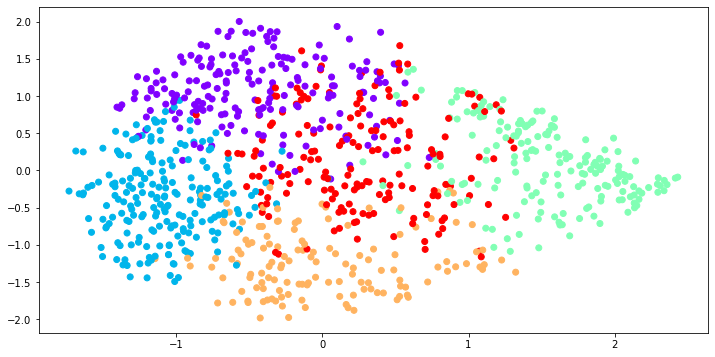

In [0]:
#visualizing clustering
plt.scatter(data_pca[:,0],data_pca[:,1],c=kmeans5,cmap="rainbow")

In [0]:
# Get cluster assignment labels
labels = kmeans.labels_
df['Group']=labels
df.head()

,age,self_employed,family_history,mh_treatment,interfere,company_size,remote,tech_company,mh_negative_consequence_flag,ph_negative_consequence_flag,mh_disscuss_coworker,mh_disscuss_supervisor,interview_mh_bringup,interview_ph_bringup,witness_mh_nc,anonymity_protected_Yes,anonymity_protected_No,anonymity_protected_Don't know,awareness_mh_benefits_Not sure,awareness_mh_benefits_Yes,awareness_mh_benefits_No,gender_M,gender_F,gender_T,medical_leave_easy_Very easy,medical_leave_easy_Somewhat difficult,medical_leave_easy_Don't know,medical_leave_easy_Very difficult,medical_leave_easy_Somewhat easy,mh_benefits_Yes,mh_benefits_No,mh_benefits_Don't know,mh_discuss_Yes,mh_discuss_No,mh_discuss_Don't know,mh_resources_Don't know,mh_resources_No,mh_resources_Yes,mh_serious_ph_Yes,mh_serious_ph_No,mh_serious_ph_Don't know,country_United States,country_United Kingdom,country_Canada,country_Netherlands,country_Australia,country_France,country_Germany,country_Ireland,country_India,Group
0,3,1,1,0,3,1,1,1,0,0,2,2,0,2,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2
1,2,0,1,1,3,4,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,4
2,2,1,0,0,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,3
3,3,0,0,1,4,3,1,1,1,0,1,2,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,4
4,3,0,0,1,1,6,0,0,1,0,0,0,0,2,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [0]:
df.groupby('Group').describe()

age                                ... country_India                    
       count      mean       std  min  25%  ...           min  25%  50%  75%  max
Group                                       ...                                  
0      190.0  2.100000  0.378664  1.0  2.0  ...           0.0  0.0  0.0  0.0  1.0
1      218.0  2.059633  0.347637  1.0  2.0  ...           0.0  0.0  0.0  0.0  1.0
2      178.0  2.207865  0.433805  2.0  2.0  ...           0.0  0.0  0.0  0.0  0.0
3      136.0  2.080882  0.323297  1.0  2.0  ...           0.0  0.0  0.0  0.0  0.0
4      174.0  2.132184  0.339668  2.0  2.0  ...           0.0  0.0  0.0  0.0  0.0

[5 rows x 400 columns]

In [0]:
df.groupby('Group').mean()

,age,self_employed,family_history,mh_treatment,interfere,company_size,remote,tech_company,mh_negative_consequence_flag,ph_negative_consequence_flag,mh_disscuss_coworker,mh_disscuss_supervisor,interview_mh_bringup,interview_ph_bringup,witness_mh_nc,anonymity_protected_Yes,anonymity_protected_No,anonymity_protected_Don't know,awareness_mh_benefits_Not sure,awareness_mh_benefits_Yes,awareness_mh_benefits_No,gender_M,gender_F,gender_T,medical_leave_easy_Very easy,medical_leave_easy_Somewhat difficult,medical_leave_easy_Don't know,medical_leave_easy_Very difficult,medical_leave_easy_Somewhat easy,mh_benefits_Yes,mh_benefits_No,mh_benefits_Don't know,mh_discuss_Yes,mh_discuss_No,mh_discuss_Don't know,mh_resources_Don't know,mh_resources_No,mh_resources_Yes,mh_serious_ph_Yes,mh_serious_ph_No,mh_serious_ph_Don't know,country_United States,country_United Kingdom,country_Canada,country_Netherlands,country_Australia,country_France,country_Germany,country_Ireland,country_India
Group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.100000,0.100000,0.384211,0.505263,2.257895,3.573684,0.315789,0.821053,0.742105,0.257895,0.947368,1.057895,0.252632,0.789474,0.063158,0.052632,0.000000,0.947368,0.568421,0.005263,0.426316,0.821053,0.173684,0.005263,0.163158,0.047368,0.589474,0.042105,0.157895,0.178947,0.031579,0.789474,0.142105,0.442105,0.415789,0.889474,0.015789,0.094737,0.247368,0.131579,0.621053,0.700000,0.157895,0.063158,0.021053,0.026316,0.000000,0.021053,0.005263,0.005263
1,2.059633,0.114679,0.371560,0.481651,2.481651,2.834862,0.288991,0.834862,1.119266,0.440367,0.866972,0.848624,0.142202,0.811927,0.160550,0.036697,0.073394,0.889908,0.201835,0.055046,0.743119,0.848624,0.137615,0.013761,0.077982,0.146789,0.486239,0.110092,0.178899,0.045872,0.500000,0.454128,0.004587,0.986239,0.009174,0.022936,0.963303,0.013761,0.087156,0.394495,0.518349,0.394495,0.302752,0.082569,0.027523,0.027523,0.013761,0.073394,0.059633,0.018349
2,2.207865,0.061798,0.500000,0.735955,2.477528,4.516854,0.224719,0.707865,0.719101,0.275281,1.101124,1.387640,0.219101,0.685393,0.230337,0.735955,0.011236,0.252809,0.146067,0.808989,0.044944,0.719101,0.269663,0.011236,0.258427,0.067416,0.320225,0.061798,0.292135,0.949438,0.044944,0.005618,0.764045,0.123596,0.112360,0.123596,0.039326,0.837079,0.528090,0.185393,0.286517,0.831461,0.067416,0.044944,0.005618,0.028090,0.000000,0.000000,0.022472,0.000000
3,2.080882,0.367647,0.433824,0.727941,2.801471,2.066176,0.514706,0.897059,0.713235,0.279412,1.183824,1.426471,0.360294,0.875000,0.169118,0.625000,0.125000,0.250000,0.095588,0.639706,0.264706,0.845588,0.132353,0.022059,0.323529,0.169118,0.051471,0.191176,0.264706,0.117647,0.794118,0.088235,0.044118,0.919118,0.036765,0.022059,0.911765,0.066176,0.558824,0.301471,0.139706,0.492647,0.198529,0.088235,0.051471,0.036765,0.007353,0.095588,0.029412,0.000000
4,2.132184,0.011494,0.637931,0.890805,2.816092,4.097701,0.229885,0.816092,1.218391,0.373563,0.821839,0.741379,0.063218,0.568966,0.178161,0.241379,0.022989,0.735632,0.126437,0.666667,0.206897,0.580460,0.385057,0.034483,0.034483,0.126437,0.626437,0.057471,0.155172,0.908046,0.068966,0.022989,0.074713,0.821839,0.103448,0.327586,0.540230,0.132184,0.051724,0.402299,0.545977,0.919540,0.017241,0.051724,0.005747,0.000000,0.000000,0.000000,0.005747,0.000000


In [0]:
df.groupby('Group').mean().rank()

,age,self_employed,family_history,mh_treatment,interfere,company_size,remote,tech_company,mh_negative_consequence_flag,ph_negative_consequence_flag,mh_disscuss_coworker,mh_disscuss_supervisor,interview_mh_bringup,interview_ph_bringup,witness_mh_nc,anonymity_protected_Yes,anonymity_protected_No,anonymity_protected_Don't know,awareness_mh_benefits_Not sure,awareness_mh_benefits_Yes,awareness_mh_benefits_No,gender_M,gender_F,gender_T,medical_leave_easy_Very easy,medical_leave_easy_Somewhat difficult,medical_leave_easy_Don't know,medical_leave_easy_Very difficult,medical_leave_easy_Somewhat easy,mh_benefits_Yes,mh_benefits_No,mh_benefits_Don't know,mh_discuss_Yes,mh_discuss_No,mh_discuss_Don't know,mh_resources_Don't know,mh_resources_No,mh_resources_Yes,mh_serious_ph_Yes,mh_serious_ph_No,mh_serious_ph_Don't know,country_United States,country_United Kingdom,country_Canada,country_Netherlands,country_Australia,country_France,country_Germany,country_Ireland,country_India
Group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,3.0,2.0,2.0,1.0,3.0,4.0,3.0,3.0,1.0,3.0,3.0,4.0,3.0,1.0,2.0,1.0,5.0,5.0,1.0,4.0,3.0,3.0,1.0,3.0,1.0,4.0,1.0,2.0,3.0,1.0,5.0,4.0,2.0,5.0,5.0,1.0,3.0,3.0,1.0,5.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,1.0,4.0
1,1.0,4.0,1.0,1.0,3.0,2.0,3.0,4.0,4.0,5.0,2.0,2.0,2.0,4.0,2.0,1.0,4.0,4.0,4.0,2.0,5.0,5.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,1.0,4.0,4.0,1.0,5.0,1.0,2.0,5.0,1.0,2.0,4.0,3.0,1.0,5.0,4.0,4.0,3.0,5.0,4.0,5.0,5.0
2,5.0,2.0,4.0,4.0,2.0,5.0,1.0,1.0,2.0,2.0,4.0,4.0,3.0,2.0,5.0,5.0,2.0,2.0,3.0,5.0,1.0,2.0,4.0,2.0,4.0,2.0,2.0,3.0,5.0,5.0,2.0,1.0,5.0,1.0,4.0,3.0,2.0,5.0,4.0,2.0,2.0,4.0,2.0,1.0,1.0,4.0,2.0,1.5,3.0,2.0
3,2.0,5.0,3.0,3.0,4.0,1.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,1.0,1.0,3.0,3.0,4.0,1.0,4.0,5.0,5.0,1.0,5.0,4.0,2.0,5.0,3.0,2.0,4.0,2.0,1.0,4.0,2.0,5.0,3.0,1.0,2.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,2.0
4,4.0,1.0,5.0,5.0,5.0,4.0,2.0,2.0,5.0,4.0,1.0,1.0,1.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,5.0,5.0,1.0,3.0,5.0,2.0,1.0,4.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0,1.0,5.0,4.0,5.0,1.0,2.0,2.0,1.0,2.0,1.5,2.0,2.0


PCA

In [0]:
distortions = [] 
inertias = [] 
mapping3 = {} 
mapping4 = {} 
K2 = range(1,20) 
  
for k in K2: 
    #Building and fitting the model 
    kmeanModel2 = KMeans(n_clusters=k).fit(df) 
    kmeanModel2.fit(df)     
    
    distortions.append(sum(np.min(cdist(df, kmeanModel2.cluster_centers_, 
                      'euclidean'),axis=1)) / df.shape[0]) 
    inertias.append(kmeanModel2.inertia_) 
  
    mapping3[k] = sum(np.min(cdist(df, kmeanModel2.cluster_centers_, 
                 'euclidean'),axis=1)) / df.shape[0] 
    mapping4[k] = kmeanModel2.inertia_ 

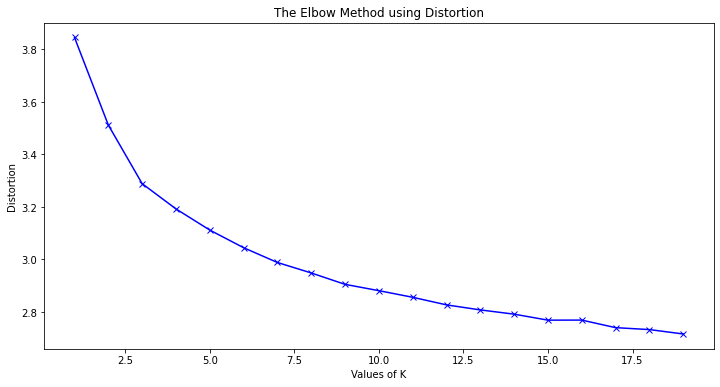

In [0]:
plt.plot(K2, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

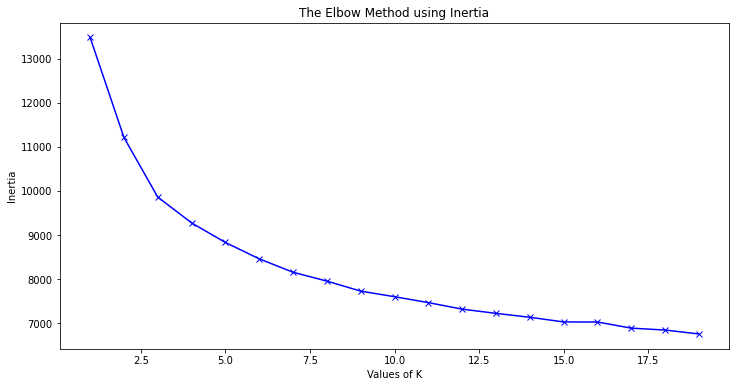

In [0]:
plt.plot(K2, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [0]:
We decided to use 6 clusters.

In [0]:
#fit the kmeans model
kmeans2= KMeans(n_clusters=6)
kmeans6=kmeans2.fit_predict(df)

In [0]:
df=np.array(df)

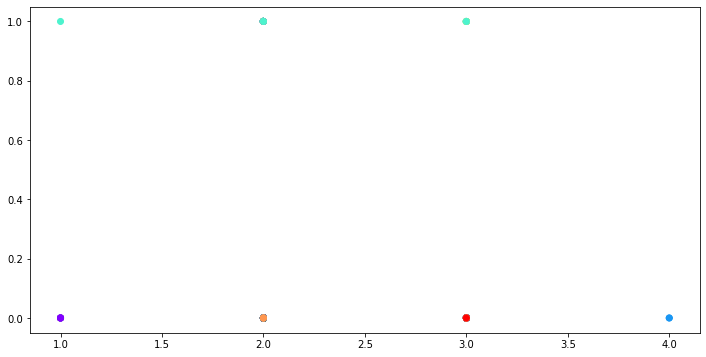

In [0]:
#visualizing clustering
plt.scatter(df[:,0],df[:,1], c=kmeans6, cmap='rainbow')

The reason why we got imperfect plot is that there are two many dimensions here.